In [19]:
# %load ./include/header.py
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./include')
import ml4s
import json
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('./include/notebook.mplstyle')
np.set_printoptions(linewidth=120)
ml4s._set_css_style('./include/bootstrap.css')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [20]:
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.colors import LogNorm


def plot_function(grid_1d, func, contours=50, log_contours=False, exact=[0,0]):
    '''Make a contour plot over the region described by grid_1d for function func.'''
    X,Y = np.meshgrid(grid_1d, grid_1d, indexing='xy')
    Z = np.zeros_like(X)
    
    # numpy bonus exercise: can you think of a way to vectorize the following for-loop?
    for i in range(len(X)):
        for j in range(len(X.T)):
            Z[i, j] = func(np.array((X[i, j], Y[i, j])))  # compute function values
    
    fig = plt.figure(figsize=plt.figaspect(0.5))
    ax = fig.add_subplot(1, 2, 1)
    
    if not log_contours:
        ax.contour(X, Y, Z, contours, cmap='Spectral_r')
    else:
        ax.contour(X, Y, Z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap='Spectral_r')
        
    ax.plot(*exact, '*', color='black')

    ax.set_xlabel(r'$w_0$')
    ax.set_ylabel(r'$w_1$')
    ax.set_aspect('equal')
    
    ax3d = fig.add_subplot(1, 2, 2, projection='3d')
    
    if log_contours:
        Z = np.log(Z)
        label = r'$\ln f(\mathbf{w}$'
    else:
        label = r'$f(\mathbf{w})$'
        
    surf = ax3d.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap='Spectral_r', 
                       linewidth=0, antialiased=True, rasterized=True)
    
    ax3d.plot([exact[0]], [exact[0]], [func(np.array(exact))], marker='*', ms=6, linestyle='-', color='k',lw=1, zorder=100)

         
    ax3d.set_xlabel(r'$w_0$',labelpad=8)
    ax3d.set_ylabel(r'$w_1$',labelpad=8)
    ax3d.set_zlabel(label,labelpad=8);
    
    return fig,ax,ax3d

## Part a
load the data from teh file and produce a plot of S vs.$\delta$

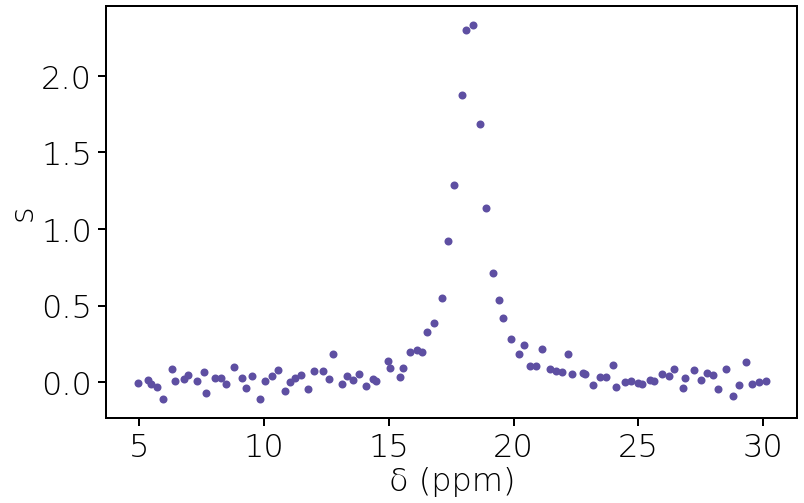

In [21]:
file_name = '../A02/C60_nmr.dat'
δ,S = np.loadtxt(file_name, unpack=True)
x=δ
y=S
plt.plot(δ,S, 'o', ms=3)
plt.xlabel('δ (ppm)')
plt.ylabel('s');

## Part b
Perform a least squares minimization via gradient descent in order to extract the optimal parameters $\alpha$ and $\beta$. These should be saved to disk in a C60_optimal.json file with the exact form (hint use indent=1 as an option to json.dump()):

{
"alpha": val,
"beta": val,
"num_iter": val,
"eta": val
}
    
where val are your calculated values, num_iter is the number of iterations, and eta is your
learning rate. This file should be submitted in your github repository and be locatable at the
path: netid/ml4s_HW/A02/C60_optimal.json.

In [22]:
def f(w,A):
    return (1/2)*w.T @ A @ w

In [23]:
from jax import jacfwd
df_dw = jacfwd(f,argnums=0)

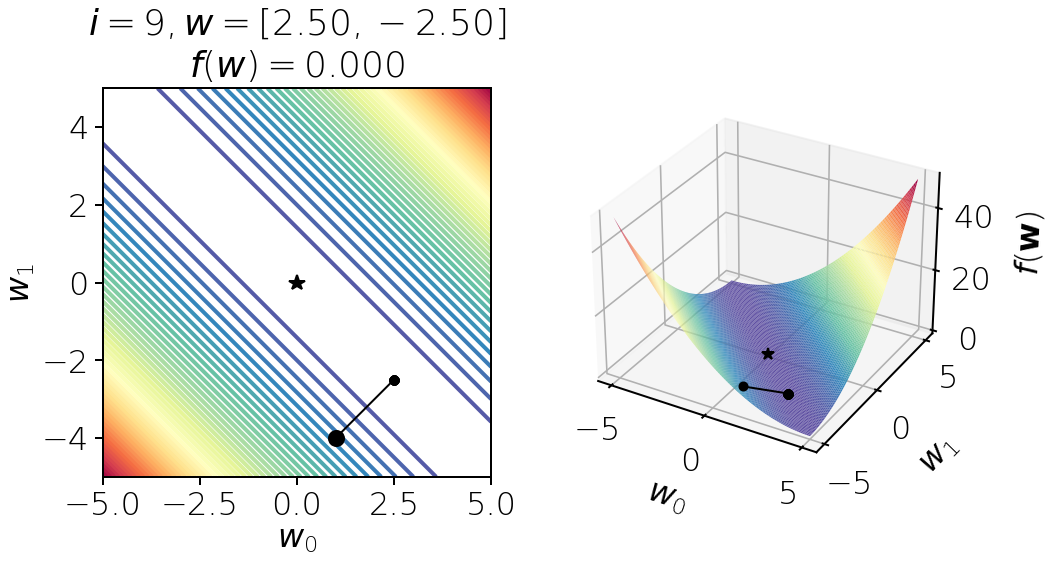

In [33]:
from IPython import display

A = np.array([[1,1],[1,1]])
fig, ax, ax3d = plot_function(np.linspace(-5, 5, 100), lambda x: f(x, A))

# hyperparameters
η = 0.5
w = np.array([1.0,-4.0])
num_iter = 10

ax.plot(*w, marker='.', color='k', ms=15)  

for i in range(num_iter):

    # we keep a copy of the previous version for plotting
    w_old = np.copy(w)
    
    # perform the GD update
    w += -η*df_dw(w, A)
    
    # plot the trajectory
    ax.plot([w_old[0], w[0]], [w_old[1], w[1]], marker='.', linestyle='-', color='k',lw=1)         
    ax3d.plot([w_old[0], w[0]], [w_old[1], w[1]], [f(w_old,A),f(w,A)], marker='.', linestyle='-', color='k',lw=1, zorder=100)
    
    ax.set_title(f'$i={i}, w=[{w[0]:.2f},{w[1]:.2f}]$' + '\n' + f'$f(w) = {f(w,A):.3f}$');
    display.display(fig)
    display.clear_output(wait=True)

In [ ]:
data={
    "alpha":<val>
    "beta":<val>
    "num_iter":<val>
    "eta":<val>
}
out_file = open("C60_optimal.json", "w")
json.dump(data, out_file, indent=1)
out_file.close()

## Part c
Produce a final plot that includes the data, a curve of best fit. Use a legend to advertise the form of the fit function with your exacted parameter values.


## Part d
Extract the optimal parameters using feature maps. You should append two
additional fields to your .json called alpha_fm and beta_fm. How do these parameters
compare to those you found in part (b)? Is the fit better or worse?